<a href="https://colab.research.google.com/github/joaoavelaar/Extracao_de_conhecimento_e_mineracao_de_dados/blob/main/Regressao_Linear_Temperatura_parte_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear - Exemplo real - parte 5

In [ ]:

# Aluno: Pedro Henrique Pereira do Nascimento

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregamento dos dados de um arquivo CSV chamado 'weatherHistory.csv' usando o Pandas
dados = pd.read_csv('weatherHistory.csv')

In [ ]:
# Visualização das primeiras linhas dos dados para uma análise inicial
dados.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Exibindo nomes das colunas

In [ ]:
# Listagem das colunas presentes nos dados para entender sua estrutura
dados.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

As colunas Formatted Date, Summary e Daily Summary não são relevantes, podendo ser excluidas

In [ ]:
# Remoção das colunas consideradas irrelevantes para a análise
dados = dados.drop(['Formatted Date','Summary','Daily Summary'],axis=1)

In [ ]:
# Visualização das primeiras linhas dos dados após a remoção das colunas
dados.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


Determinando os tipos de precipitação

In [ ]:
# Verificação dos valores únicos na coluna 'Precip Type' para entender os tipos de precipitação
dados['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [ ]:
# Preenchimento dos valores ausentes na coluna 'Precip Type' com 'sunny' (ensolarado)
dados['Precip Type'] = dados['Precip Type'].fillna('sunny')

In [ ]:
# Verificação novamente dos valores únicos na coluna 'Precip Type' para confirmar a substituição
dados['Precip Type'].unique()

array(['rain', 'snow', 'sunny'], dtype=object)

<AxesSubplot:xlabel='Precip Type', ylabel='Temperature (C)'>

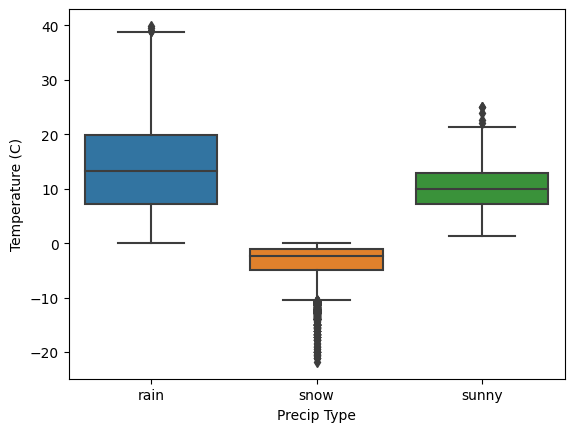

In [ ]:
# Criação de um gráfico de caixa (boxplot) para visualizar a relação entre 'Precip Type' e 'Temperature (C)'
sns.boxplot(data=dados,y='Temperature (C)',x='Precip Type')

Para os casos em que o tipo de precipitação são nulos, temos um dia sem chuva. Desta forma iremos fazer uma análise para cada um dos três casos

In [ ]:
# Separação dos dados em três conjuntos com base em 'Precip Type'
dias_sol = dados[(dados['Precip Type'] == 'sunny')]
dias_chuva = dados[(dados['Precip Type'] == 'rain')]
dias_neve = dados[(dados['Precip Type'] == 'snow')]

Graficando umidade em função da temperatura

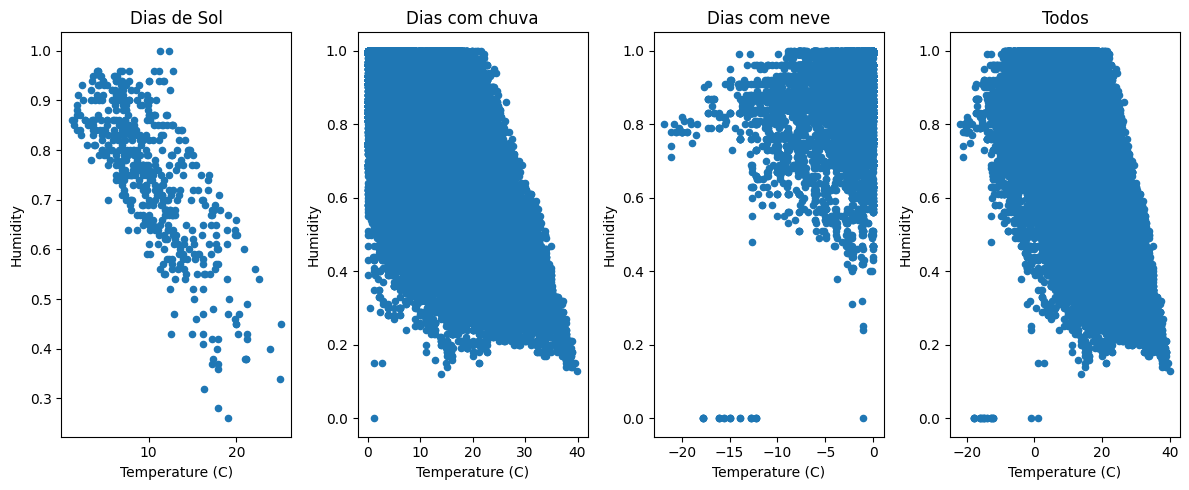

In [ ]:
# Criação de subplots para comparar 'Temperature (C)' e 'Humidity' nos diferentes tipos de dias
fig, ax = plt.subplots(1,4,figsize=(12,5))
dias_sol.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[0],title='Dias de Sol');
dias_chuva.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[1],title='Dias com chuva');
dias_neve.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[2],title='Dias com neve');
dados.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[3],title='Todos');
plt.tight_layout();

Dos gráficos observamos que os dias com sol apresentam uma relação mais próxima da linear. Nos dias com chuva podemos observar uma possível relação linear porém com uma dispersão muito maior. Já os dias com neve não é clara uma relação linear

# Dias de sol

In [ ]:
# Informações sobre o conjunto de dados 'dias_sol'
dias_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               517 non-null    object 
 1   Temperature (C)           517 non-null    float64
 2   Apparent Temperature (C)  517 non-null    float64
 3   Humidity                  517 non-null    float64
 4   Wind Speed (km/h)         517 non-null    float64
 5   Wind Bearing (degrees)    517 non-null    float64
 6   Visibility (km)           517 non-null    float64
 7   Loud Cover                517 non-null    float64
 8   Pressure (millibars)      517 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.4+ KB


In [ ]:
# Verificação de valores ausentes em 'dias_sol'
dias_sol.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

Armazenando temperatura e umidade nas variáveis X e Y

In [ ]:
# Separação dos dados em X e Y para análise de regressão linear em 'dias_sol'
X = dias_sol['Temperature (C)'].values.reshape(-1, 1)
Y = dias_sol['Humidity'].values.reshape(-1, 1)

Separando valores em amostras de treino e teste

In [ ]:
# Importação da função 'train_test_split' da biblioteca scikit-learn para dividir os dados
from sklearn.model_selection import train_test_split

In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.30, shuffle=True, random_state=0)

In [ ]:
# Tamanho dos conjuntos de treinamento e teste
X_treino.size

361

In [ ]:
# Tamanho dos conjuntos de treinamento e teste
X_teste.size

156

Criando modelo de regressão linear

In [ ]:
# Importação da classe 'LinearRegression' da biblioteca scikit-learn para criação do modelo de regressão linear
from sklearn.linear_model import LinearRegression

In [ ]:
# Criação de um modelo de regressão linear
modelo = LinearRegression()

In [ ]:
# Treinamento do modelo com os dados de treinamento
modelo.fit(X_treino,Y_treino)

LinearRegression()

In [ ]:
# Previsões com o modelo nos dados de teste
Y_previsto = modelo.predict(X_teste)

Graficando valores reais e previstos

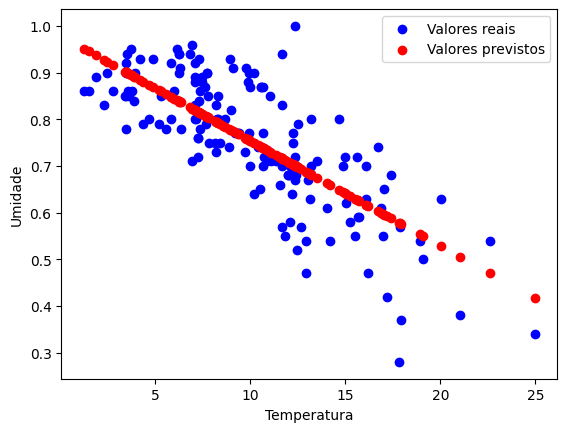

In [ ]:
# Gráfico de dispersão para comparar os valores reais e previstos
plt.scatter(X_teste,Y_teste,color='blue',label='Valores reais')
plt.scatter(X_teste,Y_previsto,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

Analisando erros da previsão

In [ ]:
# Importação das métricas de erro: 'mean_absolute_error' e 'mean_squared_error'
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
# Cálculo do MAE e RMSE para os dados de 'dias_sol'
MAE_sol = mean_absolute_error(Y_teste,Y_previsto)
RMSE_sol = np.sqrt(mean_squared_error(Y_teste,Y_previsto))

In [ ]:
# Impressão das métricas de erro
print('MAE = {:0.4f}'.format(MAE_sol))
print('RMSE = {:0.4f}'.format(RMSE_sol))

MAE = 0.0698
RMSE = 0.0891


# Dias de chuva

In [ ]:
# Informações sobre o conjunto de dados 'dias_chuva'
dias_chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85224 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               85224 non-null  object 
 1   Temperature (C)           85224 non-null  float64
 2   Apparent Temperature (C)  85224 non-null  float64
 3   Humidity                  85224 non-null  float64
 4   Wind Speed (km/h)         85224 non-null  float64
 5   Wind Bearing (degrees)    85224 non-null  float64
 6   Visibility (km)           85224 non-null  float64
 7   Loud Cover                85224 non-null  float64
 8   Pressure (millibars)      85224 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.5+ MB


In [ ]:
# Verificação de valores ausentes em 'dias_chuva'
dias_chuva.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [ ]:
# Separação dos dados de 'dias_chuva' em X e Y para análise de regressão linear
X_chuva = dias_chuva['Temperature (C)'].values.reshape(-1, 1)
Y_chuva = dias_chuva['Humidity'].values.reshape(-1, 1)

In [ ]:
# Divisão dos dados de chuva em conjuntos de treinamento e teste
X_treino_chuva, X_teste_chuva, Y_treino_chuva, Y_teste_chuva = train_test_split(X_chuva, Y_chuva, test_size=0.30, shuffle=True, random_state=0)

In [ ]:
# Tamanho dos conjuntos de treinamento e teste de chuva
X_treino_chuva.size

59656

In [ ]:
# Tamanho dos conjuntos de treinamento e teste de chuva
X_teste_chuva.size

25568

In [ ]:
# Criação de um novo modelo de regressão linear para os dados de chuva
modelo2 = LinearRegression()

In [ ]:
# Treinamento do modelo com os dados de treinamento de chuva
modelo2.fit(X_treino_chuva,Y_treino_chuva)

LinearRegression()

In [ ]:
# Previsões com o modelo nos dados de teste de chuva
Y_previsto_chuva = modelo2.predict(X_teste_chuva)

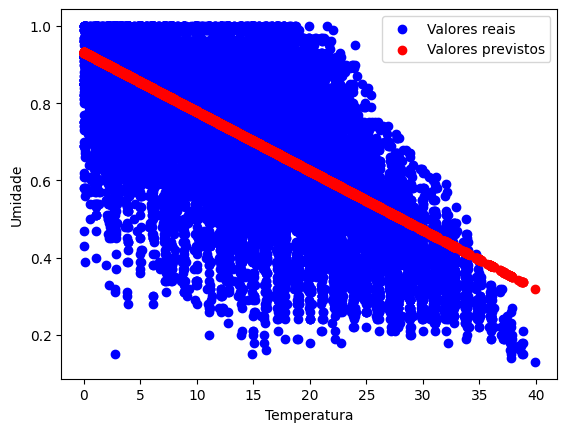

In [ ]:
# Gráfico de dispersão para comparar os valores reais e previstos em dias de chuva
plt.scatter(X_teste_chuva,Y_teste_chuva,color='blue',label='Valores reais')
plt.scatter(X_teste_chuva,Y_previsto_chuva,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [ ]:
# Cálculo do MAE e RMSE para os dados de 'dias_chuva'
MAE_chuva = mean_absolute_error(Y_teste_chuva,Y_previsto_chuva)
RMSE_chuva = np.sqrt(mean_squared_error(Y_teste_chuva,Y_previsto_chuva))

In [ ]:
# Impressão das métricas de erro para os dias de chuva
print('MAE = {:0.4f}'.format(MAE_chuva))
print('RMSE = {:0.4f}'.format(RMSE_chuva))

MAE = 0.1211
RMSE = 0.1506


# Dias com neve

In [ ]:
# Informações sobre o conjunto de dados 'dias_neve'
dias_neve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10712 entries, 1562 to 93506
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               10712 non-null  object 
 1   Temperature (C)           10712 non-null  float64
 2   Apparent Temperature (C)  10712 non-null  float64
 3   Humidity                  10712 non-null  float64
 4   Wind Speed (km/h)         10712 non-null  float64
 5   Wind Bearing (degrees)    10712 non-null  float64
 6   Visibility (km)           10712 non-null  float64
 7   Loud Cover                10712 non-null  float64
 8   Pressure (millibars)      10712 non-null  float64
dtypes: float64(8), object(1)
memory usage: 836.9+ KB


In [ ]:
# Verificação de valores ausentes em 'dias_neve'
dias_neve.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [ ]:
# Separação dos dados de 'dias_neve' em X e Y para análise de regressão linear
X_neve = dias_neve['Temperature (C)'].values.reshape(-1, 1)
Y_neve = dias_neve['Humidity'].values.reshape(-1, 1)

In [ ]:
# Divisão dos dados de neve em conjuntos de treinamento e teste
X_treino_neve, X_teste_neve, Y_treino_neve, Y_teste_neve = train_test_split(X_neve, Y_neve, test_size=0.30, shuffle=True, random_state=0)

In [ ]:
# Tamanho dos conjuntos de treinamento e teste de neve
X_treino_neve.size

7498

In [ ]:
# Tamanho dos conjuntos de treinamento e teste de neve
X_teste_neve.size

3214

In [ ]:
# Criação de um novo modelo de regressão linear para os dados de neve
modelo3 = LinearRegression()

In [ ]:
# Treinamento do modelo com os dados de treinamento de neve
modelo3.fit(X_treino_neve,Y_treino_neve)

LinearRegression()

In [ ]:
# Previsões com o modelo nos dados de teste de neve
Y_previsto_neve = modelo3.predict(X_teste_neve)

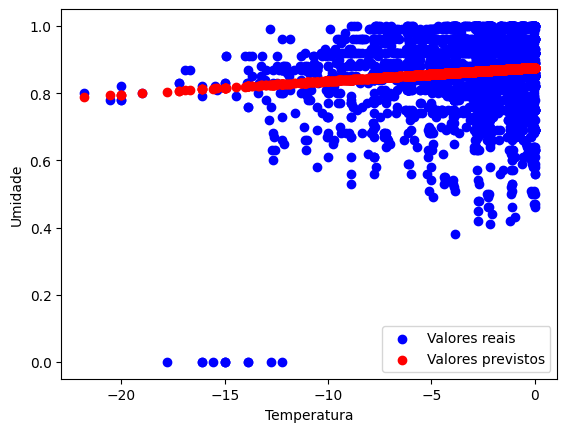

In [ ]:
# Gráfico de dispersão para comparar os valores reais e previstos em dias de neve
plt.scatter(X_teste_neve,Y_teste_neve,color='blue',label='Valores reais')
plt.scatter(X_teste_neve,Y_previsto_neve,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [ ]:
# Cálculo do MAE e RMSE para os dados de 'dias_neve'
MAE_neve = mean_absolute_error(Y_teste_neve,Y_previsto_neve)
RMSE_neve = np.sqrt(mean_squared_error(Y_teste_neve,Y_previsto_neve))

In [ ]:
# Impressão das métricas de erro para os dias de neve
print('MAE = {:0.4f}'.format(MAE_neve))
print('RMSE = {:0.4f}'.format(RMSE_neve))

MAE = 0.0824
RMSE = 0.1130
